# >>>> PREPARING A PREDICTION MODEL FOR PROFIT OF 50_STARTUPS DATA <<<<

# IMPORT LIBRARIES

In [135]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# NUMPY USED FOR MATHEMATICAL OPERATION
import numpy as np

# MATPLOTLIB IS USED FOR VISUALIZATION PURPORSE
import matplotlib.pyplot as plt

# SEABORN IS USED FOR ADVANCED VISULIZATION
import seaborn as sns

# STATS MODEL IS USED TO PERFORM STATISTICAL TESTS
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

# IT IS USED FOR IGNORE THE WARNINGS
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [136]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\assignments\\MULTI LINEAR REGRESSION\\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [137]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# DATA UNDERSTANDING

In [138]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [139]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [140]:
data1=df.rename({'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS'},axis=1)
data1

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [141]:
data1[data1.duplicated()].shape

(0, 5)

# Correlation Matrix

In [142]:
data1.corr()

,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms¶

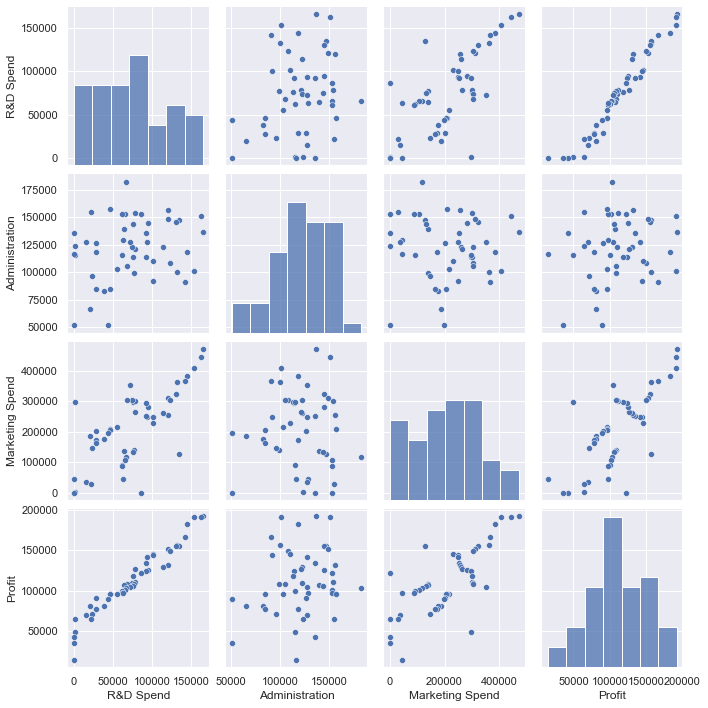

In [143]:
sns.set_style(style='darkgrid')  #Format the plot background and scatter plots for all the variables
sns.pairplot(df)


# Model Building

In [144]:
model = smf.ols('Profit~RDS+AD+MS',data=data1).fit()

# Model Testing

In [145]:
model.params  # Finding Coefficient parameters

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [146]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [147]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Build SLR and MLR models for insignificant variables 'AD' and 'MS'

In [148]:
slr_a=smf.ols("Profit~AD",data=data1).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [149]:
slr_m=smf.ols("Profit~MS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MS has significant pvalue

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [150]:
mlr_am=smf.ols("Profit~AD+MS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [151]:
model_a=smf.ols('Profit~AD',data=data1).fit()
print(model_a.tvalues, '/n', model_a.pvalues)

Intercept    3.040044
AD           1.419493
dtype: float64 /n Intercept    0.003824
AD           0.162217
dtype: float64


# Model Validation

# Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [152]:
rsq_r=smf.ols("RDS~AD+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD~RDS+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RDS+AD",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


In [153]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

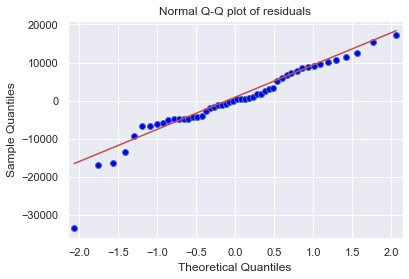

In [154]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

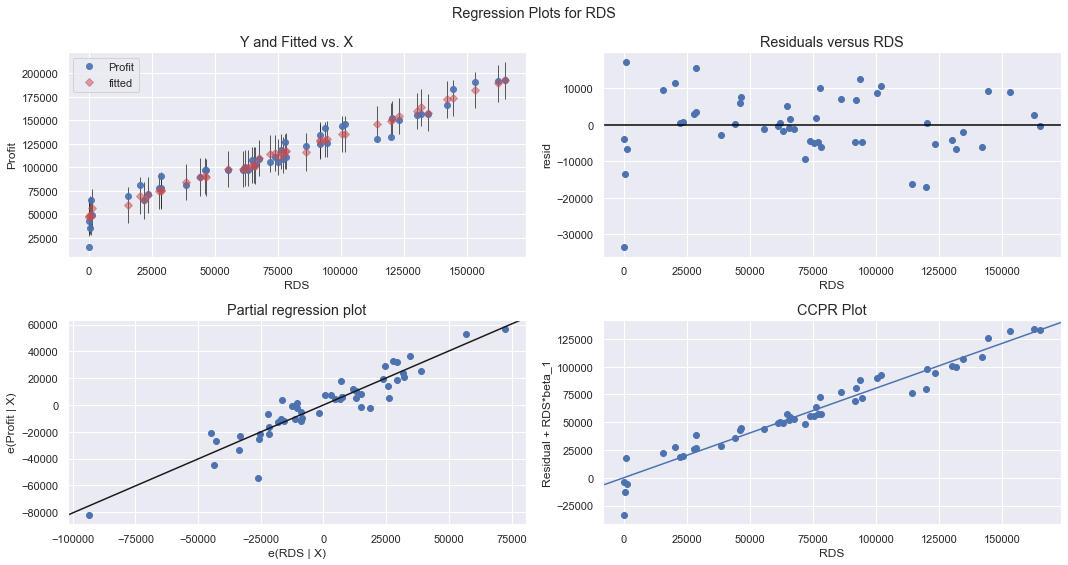

In [155]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

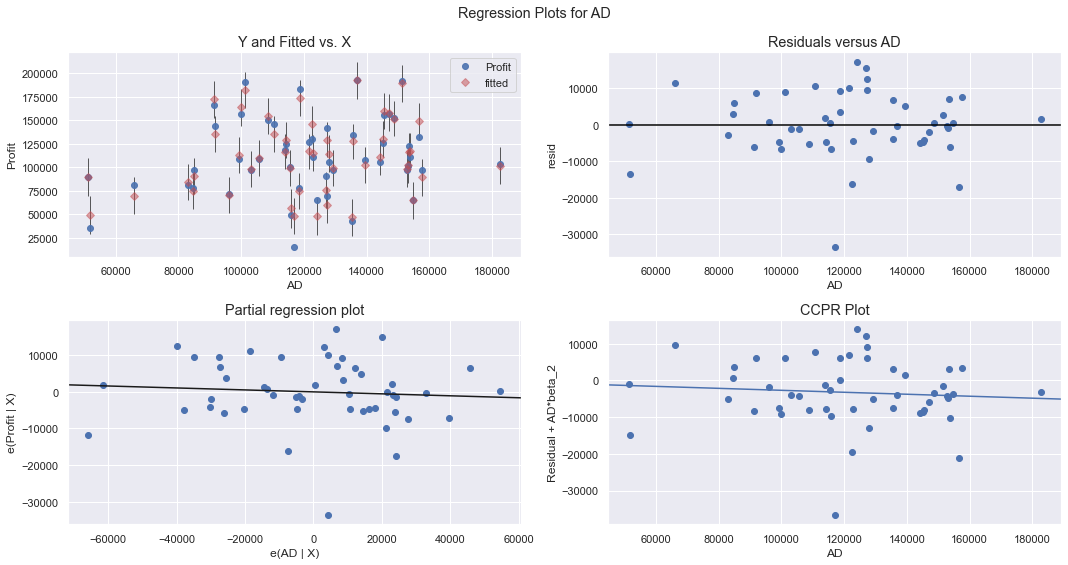

In [156]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()


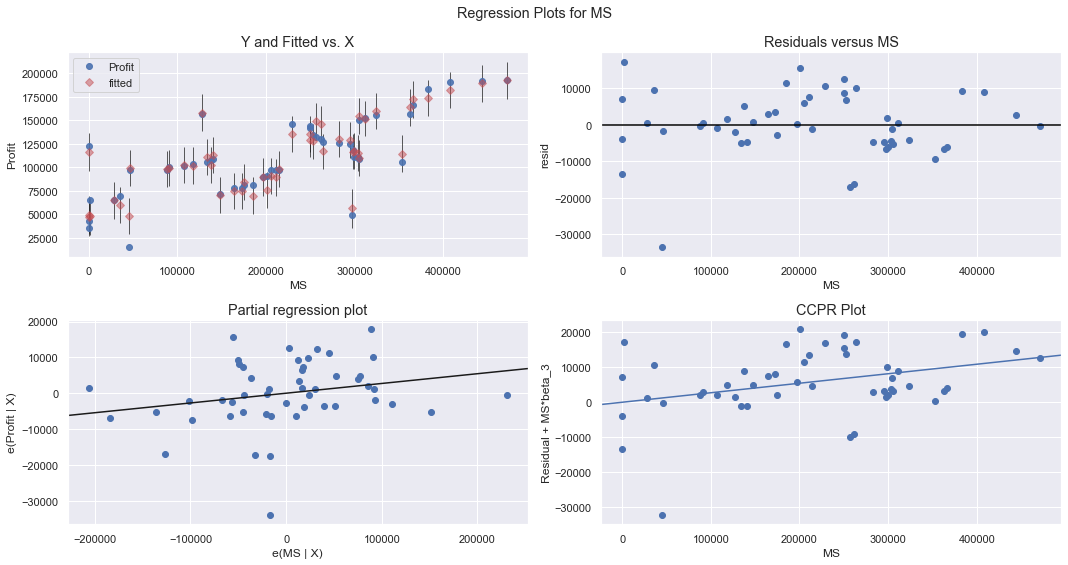

In [157]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [158]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

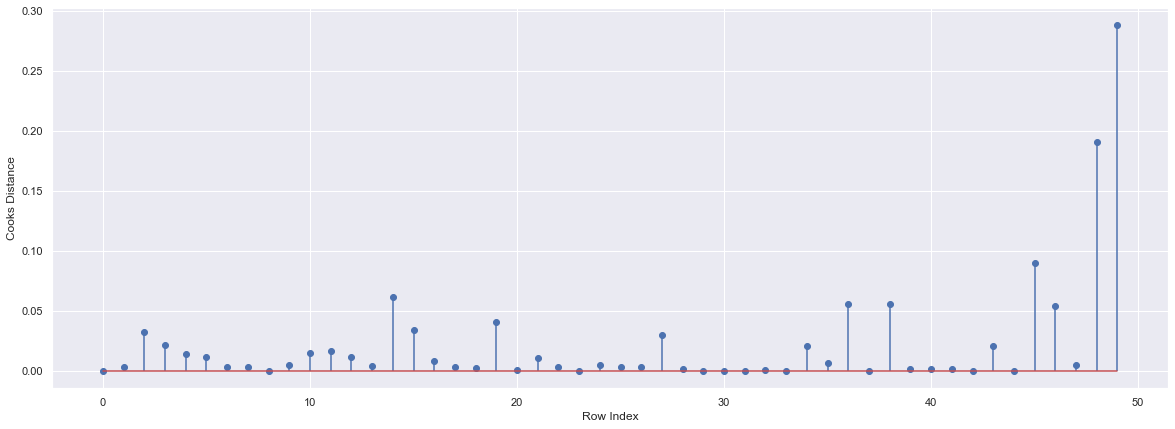

In [159]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [160]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432584)

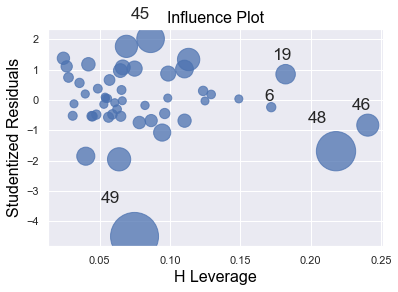

In [161]:
influence_plot(model)
plt.show()

In [162]:
data1[data1.index.isin([49])] 

,RDS,AD,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [163]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [164]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+AD+MS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+AD+MS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [165]:
final_model.rsquared


0.9613162435129847

In [166]:
data2

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Predictions

In [167]:
new_data=pd.DataFrame({'RDS':90000,"AD":120000,"MS":150000},index=[0])
new_data

,RDS,AD,MS
0,90000,120000,150000


In [168]:
final_model.predict(new_data)

0    123973.487444
dtype: float64

In [169]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

table containing R^2 value for each prepared model

In [170]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# ===============================================================

# >>>> PREPARING A PREDICTION MODEL FOR PREDICTING PRICE OF COROLLA CAR <<<<

# IMPORT LIBRARIES

In [171]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# NUMPY USED FOR MATHEMATICAL OPERATION
import seaborn as sns

# STATS MODEL IS USED TO PERFORM STATISTICAL TESTS
import statsmodels.formula.api as smf

# IMPORT DATA

In [172]:
car=pd.read_csv("C:\\Users\\DELL\\Downloads\\assignments\\MULTI LINEAR REGRESSION\\ToyotaCorolla.csv",encoding='latin1')
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [173]:
data=car.drop(columns=['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'])

In [174]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [175]:
data1=data.rename(columns={'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QT'})
data1

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [176]:
data1[data1.duplicated()]

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [177]:
data2=data1.drop_duplicates(subset=None,keep='first',inplace=False)
data2

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# DATA UNDERSTANDING

In [178]:
data2.shape

(1435, 9)

In [179]:
data2.describe()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation 

In [180]:
data2.corr()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# pair plot

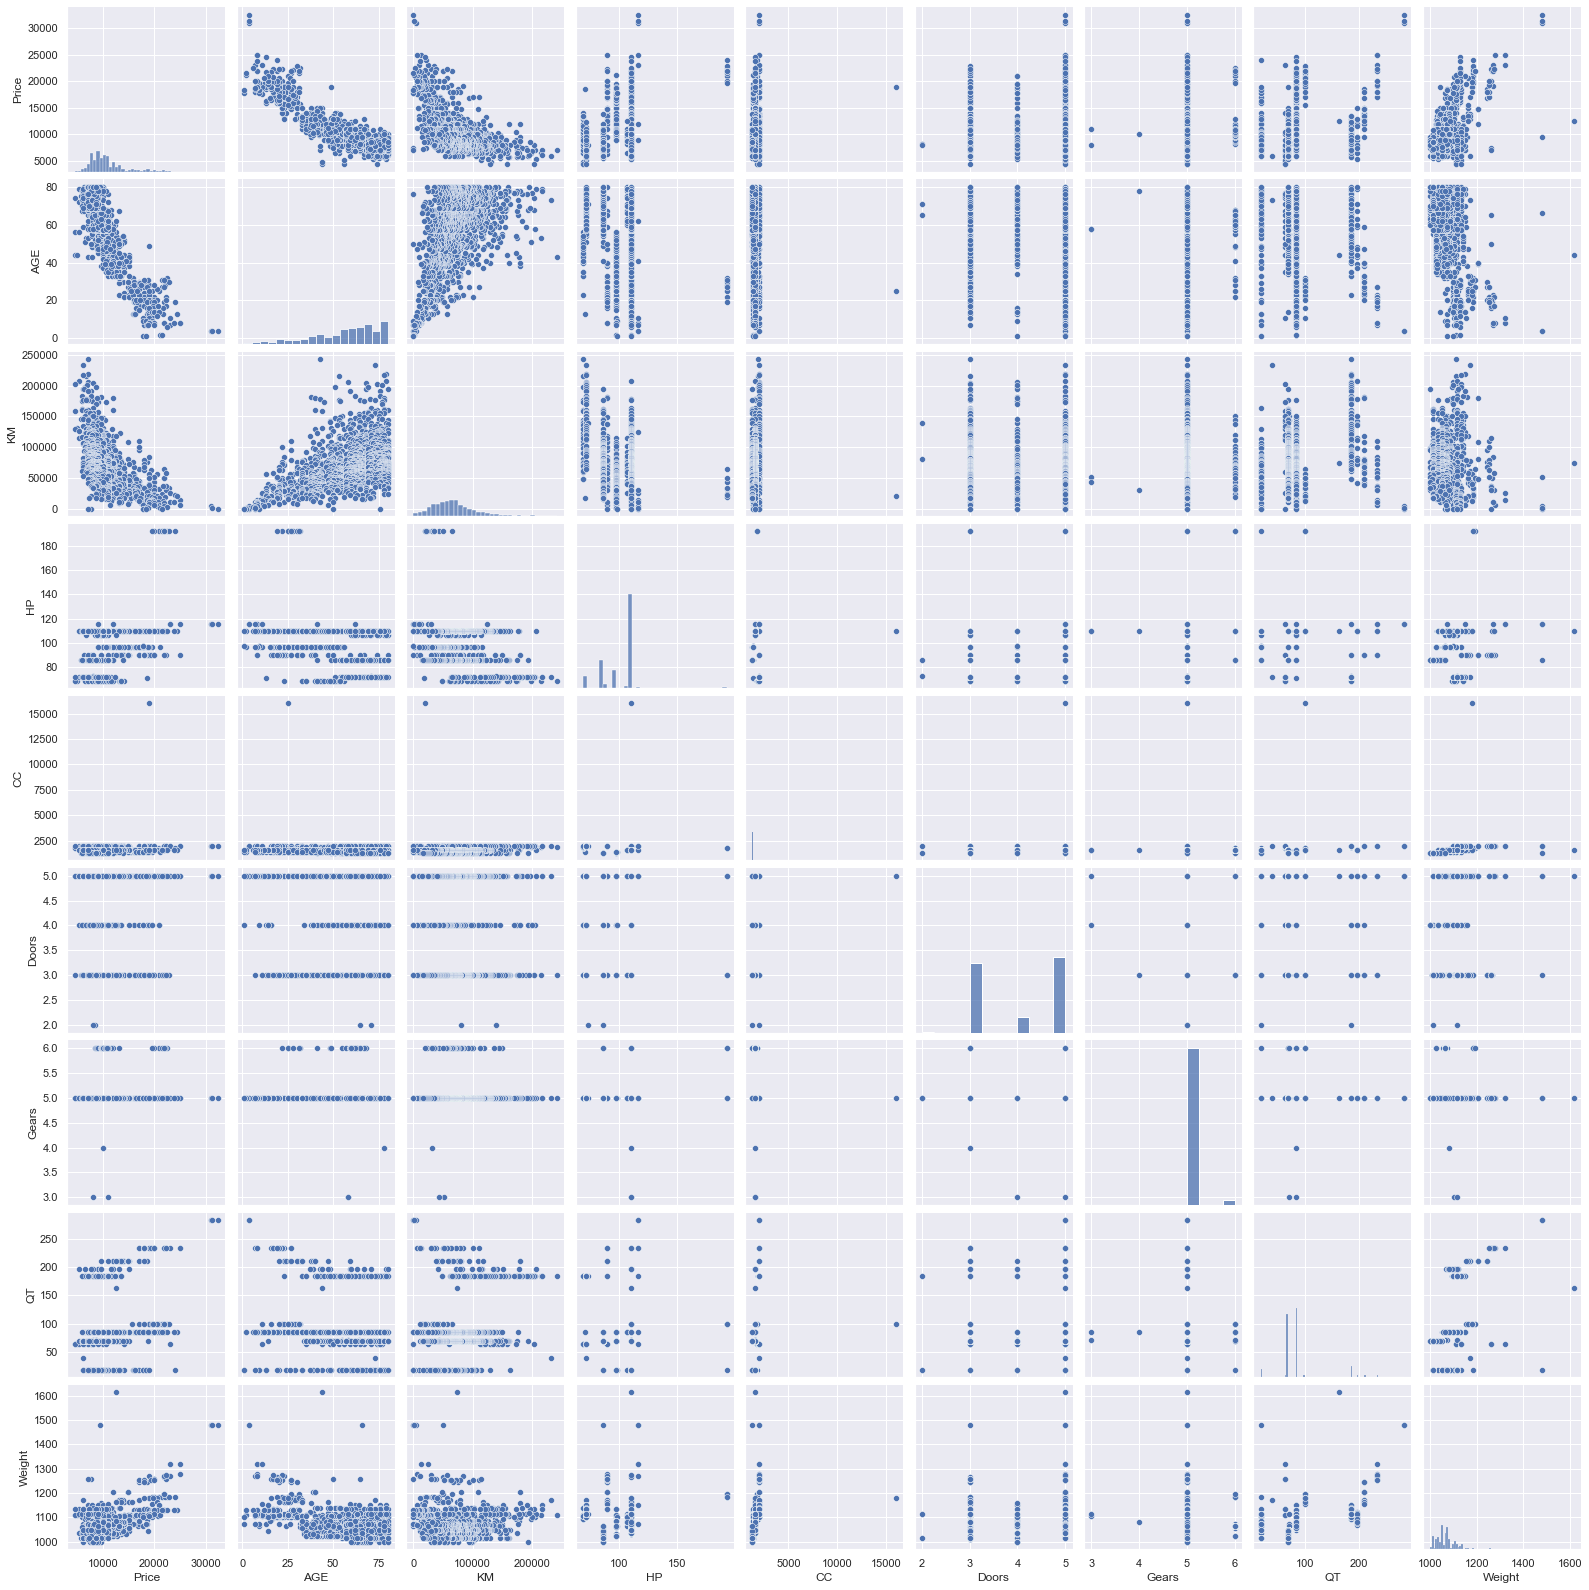

In [181]:
sns.set(style = "darkgrid")
sns.pairplot(data2)

# model building

In [182]:
model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=data2).fit()
model

In [183]:
model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [184]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.875273
AGE         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
AGE          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [185]:
(model.rsquared,model.rsquared_adj)

(0.8625200256946999, 0.8617487495415145)

But columns like 'cc' AND 'Doors' are not in the acceptance level. So,far by using some metrics we have to built a better model by droping outliers and unusual values.

# simple linear model

In [186]:
ml_cc=smf.ols('Price~CC',data = data2).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [187]:
(ml_cc.rsquared,ml_cc.rsquared_adj)

(0.015469019620240387, 0.014781977763729803)

In [188]:
ml_dd=smf.ols('Price~Doors',data = data2).fit()  
#t and p-Values
print(ml_dd.tvalues, '\n', ml_dd.pvalues)  

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [189]:
(ml_dd.rsquared,ml_dd.rsquared_adj)

(0.03371039712338786, 0.03303608476967079)

In [190]:
ml_2=smf.ols('Price~Doors+CC',data = data2).fit()  
#t and p-Values
print(ml_2.tvalues, '\n', ml_2.pvalues)

Intercept    12.786341
Doors         6.752236
CC            4.268006
dtype: float64 
 Intercept    1.580945e-35
Doors        2.109558e-11
CC           2.101878e-05
dtype: float64


In [191]:
(ml_2.rsquared,ml_2.rsquared_adj)

(0.045847771871186827, 0.04451515702743147)

# Calculating VIF 

In [192]:

rsq_Age_08_04 = smf.ols('AGE~KM+HP+CC+Doors+Gears+QT+Weight',data=data2).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~AGE+HP+CC+Doors+Gears+QT+Weight',data=data2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~AGE+KM+CC+Doors+Gears+QT+Weight',data=data2).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('CC~AGE+KM+HP+Doors+Gears+QT+Weight',data=data2).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_DO = smf.ols('Doors~AGE+KM+HP+CC+Gears+QT+Weight',data=data2).fit().rsquared  
vif_DO = 1/(1-rsq_DO)

rsq_GE = smf.ols('Gears~AGE+KM+HP+CC+Doors+QT+Weight',data=data2).fit().rsquared  
vif_GE = 1/(1-rsq_GE) 

rsq_QT = smf.ols('QT~AGE+KM+HP+CC+Gears+Weight+Doors',data=data2).fit().rsquared  
vif_QT = 1/(1-rsq_QT)

rsq_WE = smf.ols('Weight~AGE+KM+HP+CC+Doors+QT+Gears',data=data2).fit().rsquared  
vif_WE = 1/(1-rsq_WE) 


# Storing vif values in a data frame
d1 = {'Variables':['AGE','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_DO,vif_GE,vif_QT,vif_WE]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# Residual analysis
Test for Normality of Residuals (Q-Q Plot)

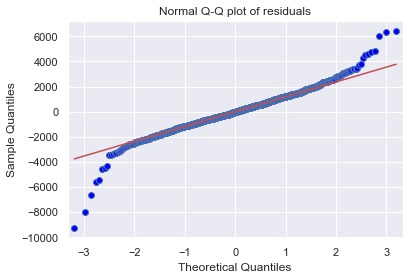

In [193]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [194]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [195]:
list(np.where(model.resid<-6000))  # outliar detection from above QQ plot of residuals

[array([220, 600, 959], dtype=int64)]

# Model Deletion Diagnostics
Detecting Influencers/Outliers using Cook's distance

In [196]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std() 

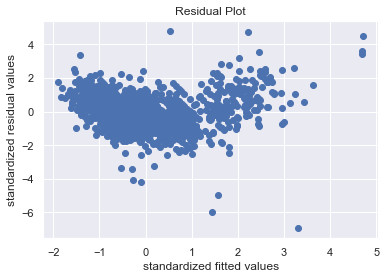

In [197]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# Residuals Vs Regressors

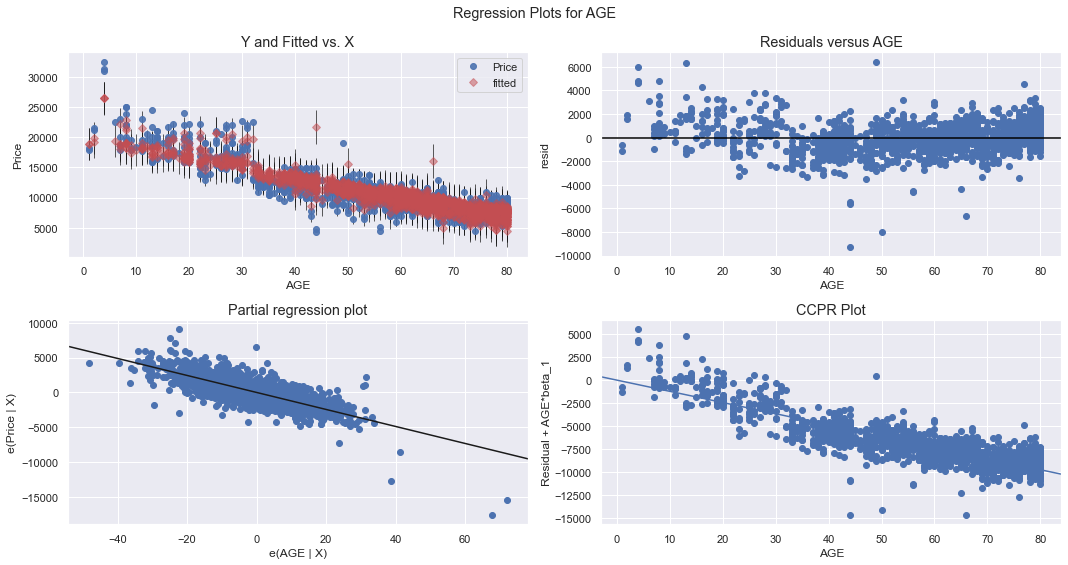

In [198]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

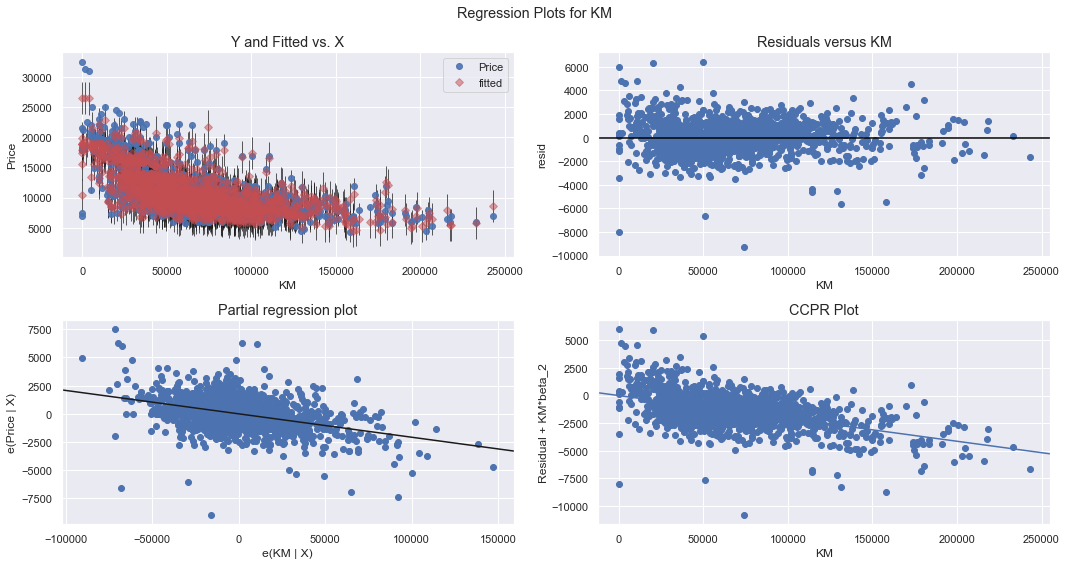

In [199]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

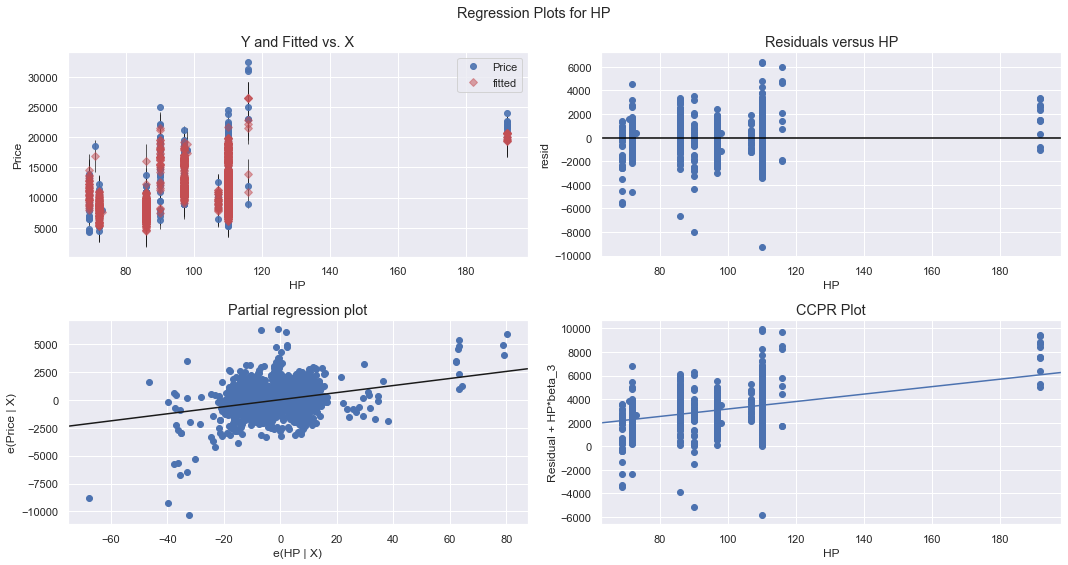

In [200]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

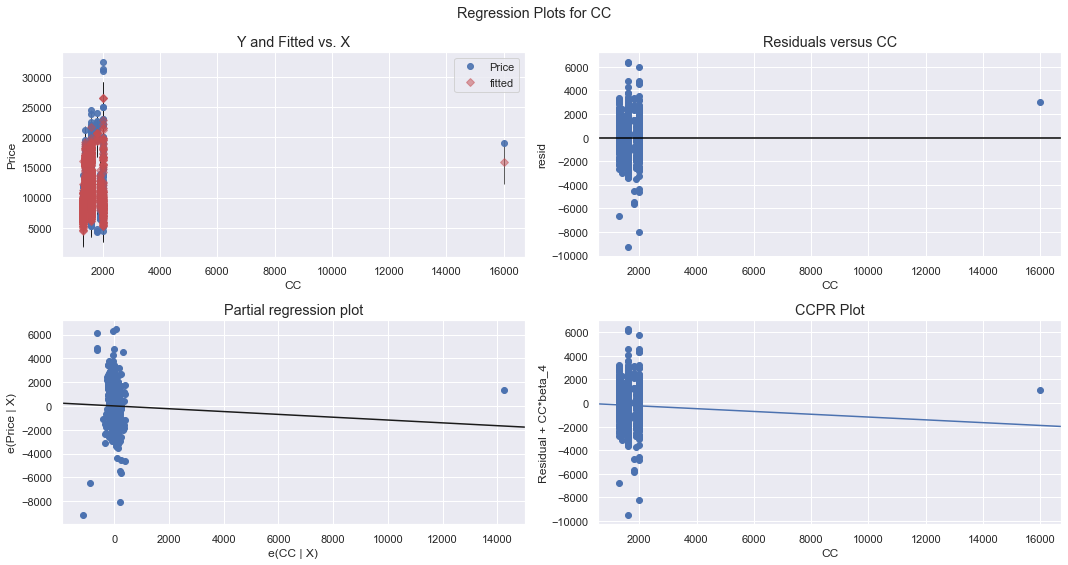

In [201]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

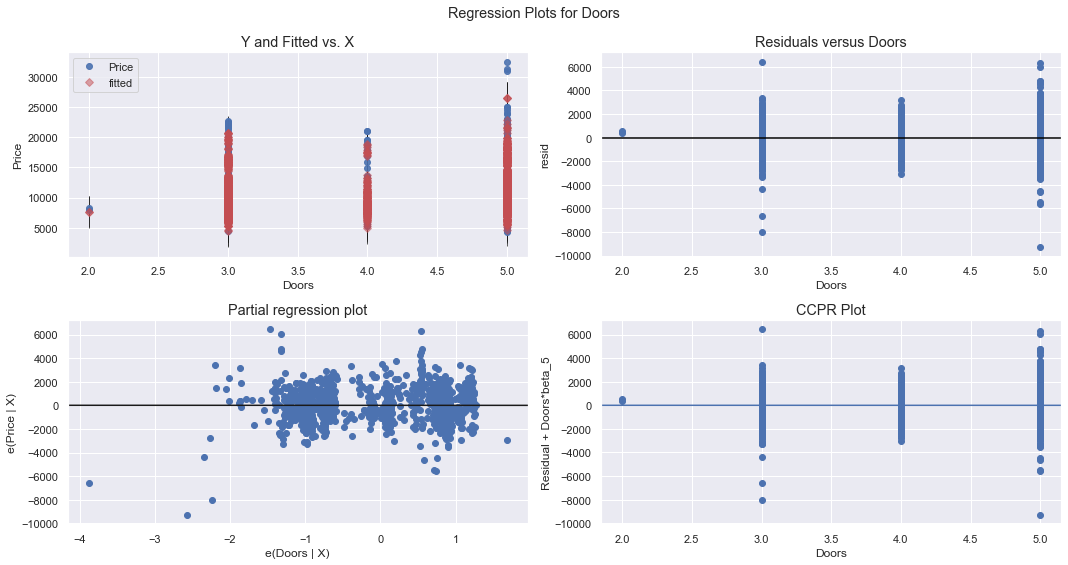

In [202]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

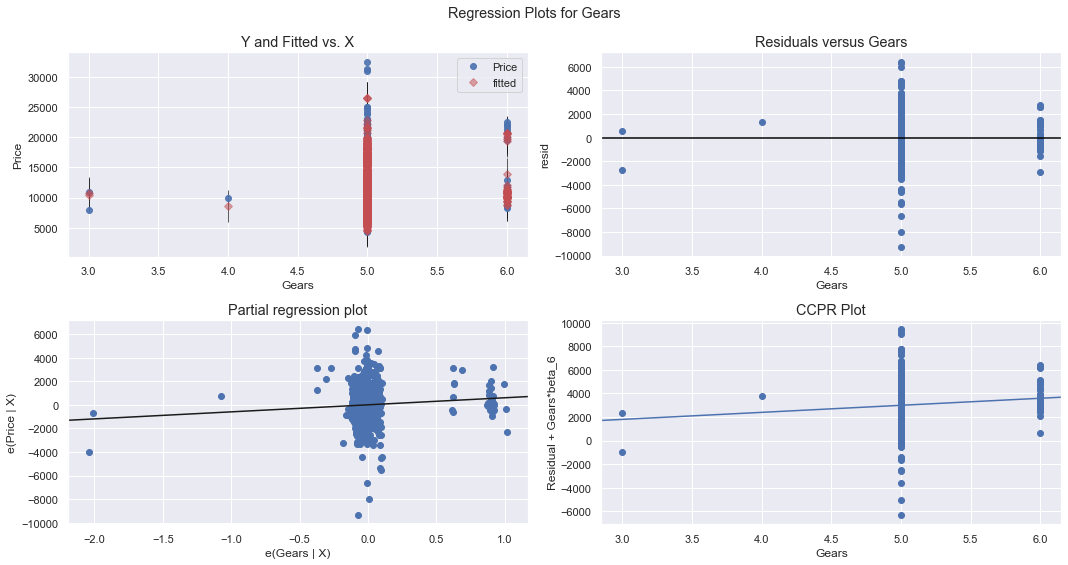

In [203]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

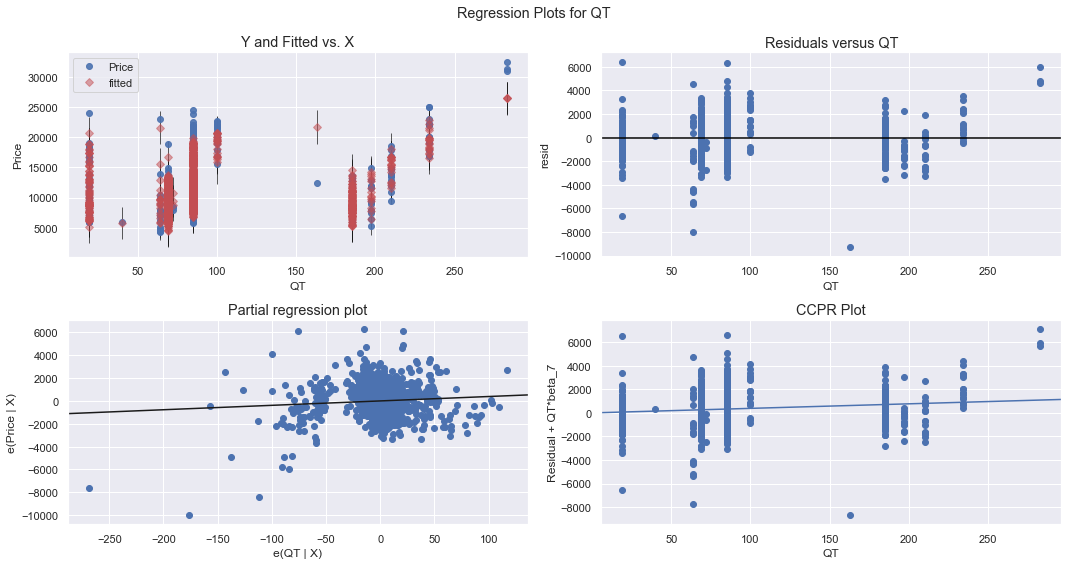

In [204]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

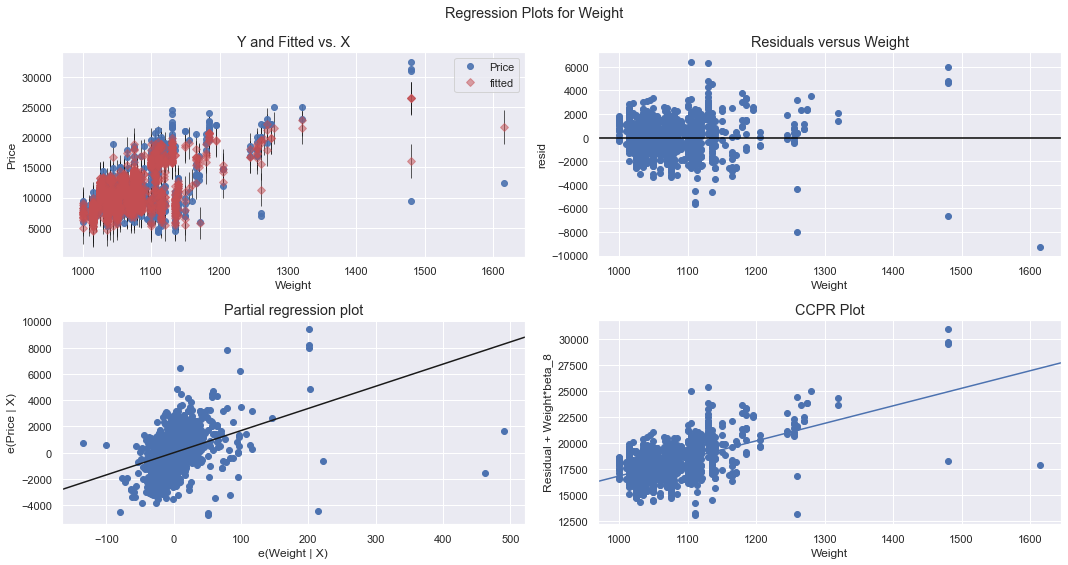

In [205]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [206]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c


array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

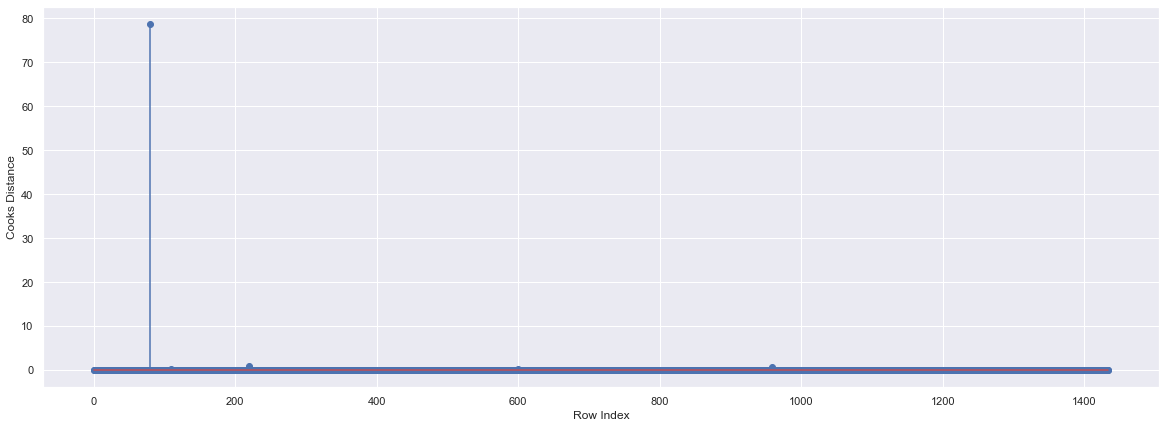

In [207]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [208]:
np.argmax(c) , np.max(c)

(80, 78.7295058224556)

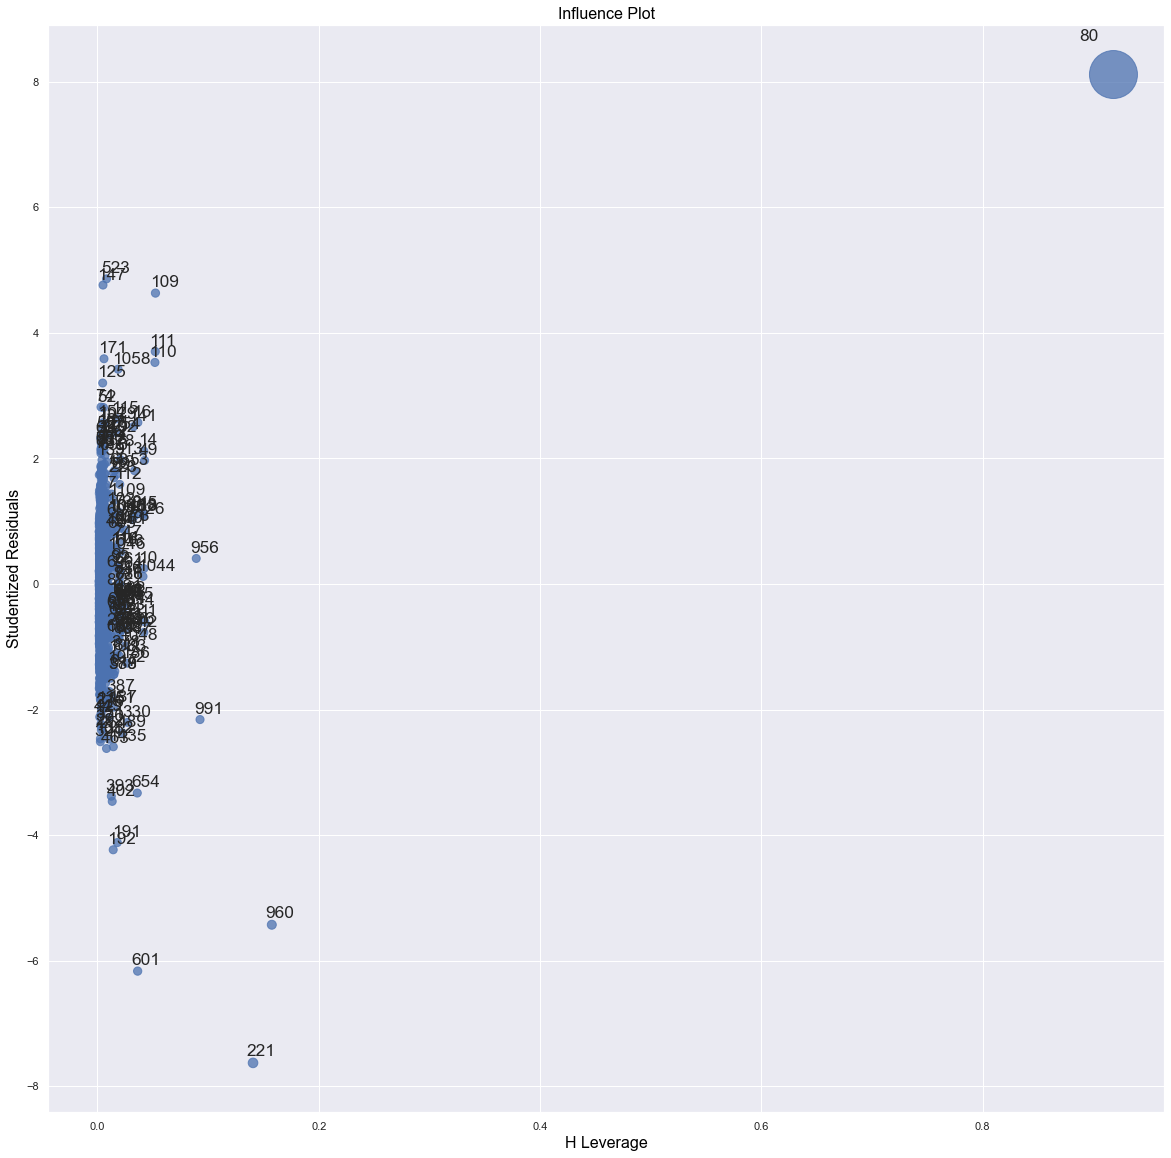

In [209]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [210]:
data2[data2.index.isin([80])] 

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [211]:
data3=data2.drop(data1.index[[80]],axis=0).reset_index(drop=True)
data3

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [212]:
while np.max(c)>0.5 :
    model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data3= data3.drop(data3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data3
else:
    final_model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [213]:
if np.max(c)>0.5:
    model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data3=data3.drop(data3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data3 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [214]:
final_model.rsquared

0.8882395145171204

In [215]:
data3

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Predictions

In [216]:
new_data=pd.DataFrame({'AGE':13,"KM":50000,"HP":90,"CC":1200,"Doors":4,"Gears":5,"QT":70,"Weight":1013},index=[0])
new_data

,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13,50000,90,1200,4,5,70,1013


In [217]:
final_model.predict(new_data)

0    14800.749742
dtype: float64

In [218]:
pred_y=final_model.predict(data3)
pred_y


0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64